In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
datasets = pd.read_csv('Patient_Cancer_SVM.csv', index_col=0, header=0)
#datasets = pd.read_csv('DemoExample_GeneExpression_SVM.csv', index_col=0, header=0)

In [52]:
datasets

,Gender,Age,Marker Gene Level,Diagnosed
User ID,,,,
1,Male,19,0.19,0
2,Male,35,0.20,0
3,Female,26,0.43,0
4,Female,27,0.57,0
5,Male,19,0.76,0
...,...,...,...,...
396,Female,46,0.41,1
397,Male,51,0.23,1
398,Female,50,0.20,1


In [53]:
X = datasets.iloc[:, [1,2]].values
Y = datasets.iloc[:, 3].values
#X = datasets.iloc[:, 1:77].values ##[2,6] for Arc and Bdnf
#Y = datasets.iloc[:, 78].values

In [54]:
X

array([[19.  ,  0.19],
       [35.  ,  0.2 ],
       [26.  ,  0.43],
       [27.  ,  0.57],
       [19.  ,  0.76],
       [27.  ,  0.58],
       [27.  ,  0.84],
       [32.  ,  1.5 ],
       [25.  ,  0.33],
       [35.  ,  0.65],
       [26.  ,  0.8 ],
       [26.  ,  0.52],
       [20.  ,  0.86],
       [32.  ,  0.18],
       [18.  ,  0.82],
       [29.  ,  0.8 ],
       [47.  ,  0.25],
       [45.  ,  0.26],
       [46.  ,  0.28],
       [48.  ,  0.29],
       [45.  ,  0.22],
       [47.  ,  0.49],
       [48.  ,  0.41],
       [45.  ,  0.22],
       [46.  ,  0.23],
       [47.  ,  0.2 ],
       [49.  ,  0.28],
       [47.  ,  0.3 ],
       [29.  ,  0.43],
       [31.  ,  0.18],
       [31.  ,  0.74],
       [27.  ,  1.37],
       [21.  ,  0.16],
       [28.  ,  0.44],
       [27.  ,  0.9 ],
       [35.  ,  0.27],
       [33.  ,  0.28],
       [30.  ,  0.49],
       [26.  ,  0.72],
       [27.  ,  0.31],
       [27.  ,  0.17],
       [33.  ,  0.51],
       [35.  ,  1.08],
       [30.

In [55]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

In [58]:
X_Train

array([[28.  ,  0.59],
       [40.  ,  0.57],
       [59.  ,  1.43],
       [57.  ,  0.26],
       [52.  ,  0.38],
       [47.  ,  1.13],
       [53.  ,  1.43],
       [35.  ,  0.27],
       [58.  ,  1.01],
       [45.  ,  0.45],
       [23.  ,  0.82],
       [46.  ,  0.23],
       [42.  ,  0.65],
       [28.  ,  0.84],
       [38.  ,  0.59],
       [26.  ,  0.84],
       [29.  ,  0.28],
       [37.  ,  0.71],
       [22.  ,  0.55],
       [48.  ,  0.35],
       [49.  ,  0.28],
       [38.  ,  0.65],
       [27.  ,  0.17],
       [46.  ,  0.28],
       [48.  ,  1.41],
       [26.  ,  0.17],
       [35.  ,  0.97],
       [39.  ,  0.59],
       [24.  ,  0.27],
       [32.  ,  0.18],
       [46.  ,  0.88],
       [35.  ,  0.58],
       [56.  ,  0.6 ],
       [47.  ,  0.34],
       [40.  ,  0.72],
       [32.  ,  1.  ],
       [19.  ,  0.21],
       [25.  ,  0.9 ],
       [35.  ,  0.88],
       [28.  ,  0.32],
       [50.  ,  0.2 ],
       [40.  ,  0.59],
       [50.  ,  0.44],
       [35.

In [59]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.fit_transform(X_Test)

In [60]:
X_Test

array([[-7.06181706e-01,  4.12346965e-01],
       [ 4.40777426e-02, -6.79376663e-01],
       [-2.37269551e-01,  5.82744369e-02],
       [-7.06181706e-01,  1.76298613e-01],
       [-2.37269551e-01, -6.79376663e-01],
       [-9.87528999e-01, -1.56455798e+00],
       [-6.12399275e-01, -1.71208820e+00],
       [-1.43487120e-01,  2.09419147e+00],
       [-1.83157088e+00, -1.48267871e-01],
       [ 8.88119622e-01, -8.85918971e-01],
       [-7.06181706e-01, -7.08882707e-01],
       [-8.93746568e-01, -5.31846443e-01],
       [-4.97046885e-02, -5.31846443e-01],
       [ 1.37860174e-01,  1.17286525e-01],
       [-1.64400602e+00,  3.82840921e-01],
       [-5.18616844e-01,  1.29752829e+00],
       [-4.97046885e-02,  1.17286525e-01],
       [-1.73778845e+00,  3.53334877e-01],
       [ 1.63837907e+00,  1.68110686e+00],
       [-2.37269551e-01, -1.50554590e+00],
       [-2.37269551e-01, -7.67894795e-01],
       [ 8.88119622e-01,  2.09419147e+00],
       [ 3.25425036e-01, -6.49870619e-01],
       [ 8.

In [61]:
from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', random_state = 0) ## rbf: Radial Basis Function
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [62]:
Y_Pred = classifier.predict(X_Test)
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0])

In [63]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(Y_Test, Y_Pred)
cm_test

array([[117,   6],
       [ 37,  40]])

In [64]:
tn, fp, fn, tp = confusion_matrix(Y_Test, Y_Pred).ravel()
(tn, fp, fn, tp)

(117, 6, 37, 40)

In [65]:
my_recall = tp/(tp + fn)
my_recall

0.5194805194805194

In [66]:
my_pre = tp/(tp + fp)
my_pre

0.8695652173913043

In [67]:
from sklearn.metrics import recall_score
test_recall = recall_score(Y_Test, Y_Pred)
test_recall

0.5194805194805194

In [68]:
from sklearn.metrics import precision_score
test_p = precision_score(Y_Test, Y_Pred)
test_p

0.8695652173913043

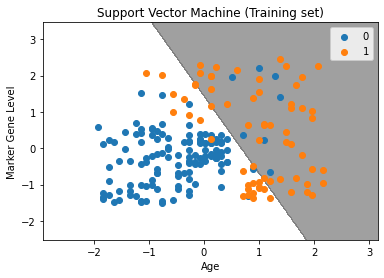

In [69]:
from matplotlib.colors import ListedColormap
plot1=plt.figure(1)
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'gray')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                cmap = ListedColormap(('blue', 'purple'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Marker Gene Level')
plt.legend()

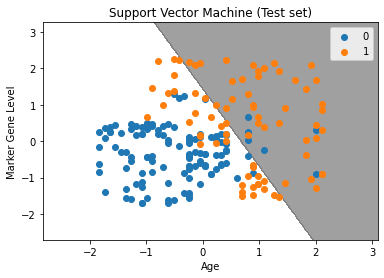

In [70]:
plot2=plt.figure(2)
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'gray')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                cmap = ListedColormap(('blue', 'purple'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Marker Gene Level')
plt.legend()
plt.show()